<a href="https://colab.research.google.com/github/yubars/ML-and-Cybersecurity-projects/blob/main/Loading_and_Understanding_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

Loading and Understanding Your Data
** Learning Objectives **
* Learn the basics of reading data, data cleaning and handling missing data using Pandas.
* Learn how to visualize data with a scatter plot.
* Use Numpy to generate the line minimizing squared loss.
* Explore visually the difference in the model when replacing missing items by 0s versus the mean value for that feature.

### Imports
In this first cell, we'll import some libraries, including  [Pandas](http://pandas.pydata.org/), which is a package we use for reading in our data, exploring our data and doing some basic processing. Run this cell to execute the code.

In [ ]:
import fnmatch
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
#from tensorflow.python.data import Dataset
print("Done with the imports.")

Done with the imports.


### Set up Pandas Options

Next we set up some options to control how items are displayed and the maximum number of rows to show when displaying a table.  Feel free to change this setup to whatever you'd like.

As illustrated below, in colab you can define code cells that do not generate any output. In fact, the first cell would also have been that way except for the `print` statement at the end added just to help illustrate this aspect of colab. If at any point you are not sure if a cell is successfully running, you can add a print statement, but that should not be necessary since you can visually see when the cell is done running when the arrow is showing again. Also note that when you select the next cell the number showing the execution order of the cell appears.

In [ ]:
# Set the output display to have two digits for decimal places, for display
# readability only and limit it to printing 15 rows.
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 15

### Data Set
This lab will use a data set from 1985 Ward's Automotive Yearbook that is part of the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets) under [Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/automobile).  You can find a description of the data at [https://archive.ics.uci.edu/ml/datasets/automobile](https://archive.ics.uci.edu/ml/datasets/automobile).  Since this data set is provided as a comma separated file without a header row, we provide column headers when loading it with Pandas.

### Loading and Randomizing the Data
Load the data using the column names from [Automobile Data Set](https://archive.ics.uci.edu/ml/datasets/automobile). When using SGD (stochastic graident descent) for training it is important that **each batch is a random sample of the data** so that the gradient computed is representative.  While there appears to be no order to this data set, it is always good practice to shuffle the data to be in a random order.


In [ ]:
# Provide the names for the columns since the CSV file with the data does
# not have a header row.
cols = ['symboling', 'losses', 'make', 'fuel-type', 'aspiration', 'num-doors',
        'body-style', 'drive-wheels', 'engine-location', 'wheel-base',
        'length', 'width', 'height', 'weight', 'engine-type', 'num-cylinders',
        'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
        'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


# Load in the data from a CSV file that is comma seperated.
car_data = pd.read_csv('https://storage.googleapis.com/ml_universities/cars_dataset/cars_data.csv',
                        sep=',',names = cols, header=None, encoding='latin-1')

# We'll then randomize the data, just to be sure not to get any pathological
# ordering effects that might harm the performance of Stochastic Gradient
# Descent.
car_data = car_data.reindex(np.random.permutation(car_data.index))
#car_data= car_data.sample(frac=1).reset_index(drop = True)

In [ ]:
#car_data = pd.read_csv("", names = cols, sep = ',')
car_data.head(10)

,symboling,losses,make,fuel-type,aspiration,num-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,weight,engine-type,num-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
91,1,128,nissan,gas,std,two,sedan,fwd,front,94.50,165.30,63.80,54.50,1918,ohc,four,97,2bbl,3.15,3.29,9.40,69,5200,31,37,6649
93,1,103,nissan,gas,std,four,wagon,fwd,front,94.50,170.20,63.80,53.50,2024,ohc,four,97,2bbl,3.15,3.29,9.40,69,5200,31,37,7349
64,0,115,mazda,gas,std,four,hatchback,fwd,front,98.80,177.80,66.50,55.50,2425,ohc,four,122,2bbl,3.39,3.39,8.60,84,4800,26,32,11245
62,0,115,mazda,gas,std,four,sedan,fwd,front,98.80,177.80,66.50,55.50,2410,ohc,four,122,2bbl,3.39,3.39,8.60,84,4800,26,32,10245
30,2,137,honda,gas,std,two,hatchback,fwd,front,86.60,144.60,63.90,50.80,1713,ohc,four,92,1bbl,2.91,3.41,9.60,58,4800,49,54,6479
173,-1,65,toyota,gas,std,four,sedan,fwd,front,102.40,175.60,66.50,54.90,2326,ohc,four,122,mpfi,3.31,3.54,8.70,92,4200,29,34,8948
65,0,118,mazda,gas,std,four,sedan,rwd,front,104.90,175.00,66.10,54.40,2670,ohc,four,140,mpfi,3.76,3.16,8.00,120,5000,19,27,18280
183,2,122,volkswagen,gas,std,two,sedan,fwd,front,97.30,171.70,65.50,55.70,2209,ohc,four,109,mpfi,3.19,3.40,9.00,85,5250,27,34,7975
13,0,188,bmw,gas,std,four,sedan,rwd,front,101.20,176.80,64.80,54.30,2765,ohc,six,164,mpfi,3.31,3.19,9.00,121,4250,21,28,21105
185,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.30,171.70,65.50,55.70,2212,ohc,four,109,mpfi,3.19,3.40,9.00,85,5250,27,34,8195


### Examine the Data

It's a good idea to get to know your data a little bit before you work with it. Let's look at the header row and the first 10 rows of data.


In [ ]:
car_data[1:10]

,symboling,losses,make,fuel-type,aspiration,num-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,weight,engine-type,num-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
93,1,103,nissan,gas,std,four,wagon,fwd,front,94.50,170.20,63.80,53.50,2024,ohc,four,97,2bbl,3.15,3.29,9.40,69,5200,31,37,7349
64,0,115,mazda,gas,std,four,hatchback,fwd,front,98.80,177.80,66.50,55.50,2425,ohc,four,122,2bbl,3.39,3.39,8.60,84,4800,26,32,11245
62,0,115,mazda,gas,std,four,sedan,fwd,front,98.80,177.80,66.50,55.50,2410,ohc,four,122,2bbl,3.39,3.39,8.60,84,4800,26,32,10245
30,2,137,honda,gas,std,two,hatchback,fwd,front,86.60,144.60,63.90,50.80,1713,ohc,four,92,1bbl,2.91,3.41,9.60,58,4800,49,54,6479
173,-1,65,toyota,gas,std,four,sedan,fwd,front,102.40,175.60,66.50,54.90,2326,ohc,four,122,mpfi,3.31,3.54,8.70,92,4200,29,34,8948
65,0,118,mazda,gas,std,four,sedan,rwd,front,104.90,175.00,66.10,54.40,2670,ohc,four,140,mpfi,3.76,3.16,8.00,120,5000,19,27,18280
183,2,122,volkswagen,gas,std,two,sedan,fwd,front,97.30,171.70,65.50,55.70,2209,ohc,four,109,mpfi,3.19,3.40,9.00,85,5250,27,34,7975
13,0,188,bmw,gas,std,four,sedan,rwd,front,101.20,176.80,64.80,54.30,2765,ohc,six,164,mpfi,3.31,3.19,9.00,121,4250,21,28,21105
185,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.30,171.70,65.50,55.70,2212,ohc,four,109,mpfi,3.19,3.40,9.00,85,5250,27,34,8195


### Look at Some Basic Statistics About the Data
We'll print out a quick summary of a few useful statistics on each column. This will include things like mean, standard deviation, max, min, and various quantiles.

In [ ]:
car_data.describe()

,symboling,wheel-base,length,width,height,weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,10.14,25.22,30.75
std,1.25,6.02,12.34,2.15,2.44,520.68,41.64,3.97,6.54,6.89
min,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,7.00,13.00,16.00
25%,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,8.60,19.00,25.00
50%,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,9.00,24.00,30.00
75%,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,9.40,30.00,34.00
max,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,23.00,49.00,54.00


### Handling Missing Data Entries
Why are some columns such as the price and losses not showing in the summary column?  If we look at the data more carefuly, we'll see that a "?" was used in this data set to indicate that a value is unknown.

Pandas provices a method [to_numeric](http://pandas.pydata.org/pandas-docs/version/0.18.1/generated/pandas.to_numeric.html) that converts a column to be numeric. There are three options about how to handle errors (entries that are not numeric) of which 'coerce' is what we want to use in this situation, since it converts those entries to pandas representation `NaN` for "not a number".

Notice now when you use `describe` to see the statistics for the entries that are a number, the count indicates how many entries had a number (not `NaN`) for that column.

In [ ]:
car_data['city-mpg'] = pd.to_numeric(car_data['city-mpg'], errors= 'coerce')


In [ ]:
car_data['price'] = pd.to_numeric(car_data['price'], errors='coerce')
car_data['horsepower'] = pd.to_numeric(car_data['horsepower'], errors='coerce')
car_data['peak-rpm'] = pd.to_numeric(car_data['peak-rpm'], errors='coerce')
car_data['city-mpg'] = pd.to_numeric(car_data['city-mpg'], errors='coerce')
car_data['highway-mpg'] = pd.to_numeric(car_data['highway-mpg'], errors='coerce')
car_data['losses'] = pd.to_numeric(car_data['losses'], errors='coerce')
car_data.describe()

,symboling,losses,wheel-base,length,width,height,weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.00,164.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,203.00,203.00,205.00,205.00,201.00
mean,0.83,122.00,98.76,174.05,65.91,53.72,2555.57,126.91,10.14,104.26,5125.37,25.22,30.75,13207.13
std,1.25,35.44,6.02,12.34,2.15,2.44,520.68,41.64,3.97,39.71,479.33,6.54,6.89,7947.07
min,-2.00,65.00,86.60,141.10,60.30,47.80,1488.00,61.00,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,0.00,94.00,94.50,166.30,64.10,52.00,2145.00,97.00,8.60,70.00,4800.00,19.00,25.00,7775.00
50%,1.00,115.00,97.00,173.20,65.50,54.10,2414.00,120.00,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,2.00,150.00,102.40,183.10,66.90,55.50,2935.00,141.00,9.40,116.00,5500.00,30.00,34.00,16500.00
max,3.00,256.00,120.90,208.10,72.30,59.80,4066.00,326.00,23.00,288.00,6600.00,49.00,54.00,45400.00


### Replacing NAN by zero
When training a linear model using features that is numerical, we **cannot have `NaN` (doing so would cause overflow when training)**. Here we replace `NaN` (which corresponding to where we had missing entries) by 0.

In [ ]:
# Replace nan by 0 storing the solution in the same table (`inplace')
car_data.fillna(0, inplace=True)
car_data.describe()

,symboling,losses,wheel-base,length,width,height,weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,97.60,98.76,174.05,65.91,53.72,2555.57,126.91,10.14,103.24,5075.37,25.22,30.75,12949.43
std,1.25,58.28,6.02,12.34,2.15,2.44,520.68,41.64,3.97,40.83,694.65,6.54,6.89,8079.04
min,-2.00,0.00,86.60,141.10,60.30,47.80,1488.00,61.00,7.00,0.00,0.00,13.00,16.00,0.00
25%,0.00,77.00,94.50,166.30,64.10,52.00,2145.00,97.00,8.60,70.00,4800.00,19.00,25.00,7689.00
50%,1.00,103.00,97.00,173.20,65.50,54.10,2414.00,120.00,9.00,95.00,5200.00,24.00,30.00,10198.00
75%,2.00,137.00,102.40,183.10,66.90,55.50,2935.00,141.00,9.40,116.00,5500.00,30.00,34.00,16500.00
max,3.00,256.00,120.90,208.10,72.30,59.80,4066.00,326.00,23.00,288.00,6600.00,49.00,54.00,45400.00


### Using a Scatter Plot to Visualize the Data

We will begin by trying to predict the price using the horsepower.  Because we just have a single feature we can visualize the raw data using a scatter plot.

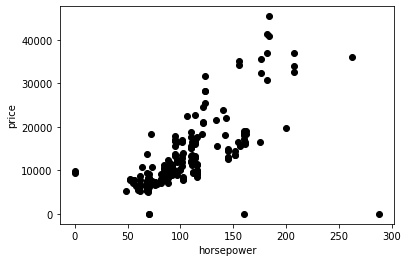

In [ ]:
INPUT_FEATURE = "horsepower"
LABEL = "price"

plt.ylabel(LABEL)
plt.xlabel(INPUT_FEATURE)
plt.scatter(car_data[INPUT_FEATURE], car_data[LABEL], c='black')
plt.show()

###Using Numpy polyfit to Find the Line that Minimizes RMSE
For the task of finding a line that minimizes the squared error with respect to a set of points, using SGD is not the most efficient method but it will be useful in that it can be applied to much more complex problems.  As a tool to help see what the optimal solution looks like we wil use `polyfit` to compute the optimal solution and then add that to our plot.

In [ ]:
x = car_data[INPUT_FEATURE]
y = car_data[LABEL]
opt = np.polyfit(x, y, 1)
y_pred = opt[0] * x + opt[1]
opt_rmse = math.sqrt(metrics.mean_squared_error(y_pred, y))
slope = opt[0]
bias = opt[1]
print("Optimal RMSE =", opt_rmse, "for solution", opt)

Optimal RMSE = 5823.494869419034 for solution [  136.77704681 -1171.29960347]


###Visualizing a Linear Model Using a Scatter Plot

When training a linear regression model over a single variable, a really nice thing to be able to do is to show the model (which is just a line) as part of the scatter plot. That really helps you see how well the model fits the data. Just looking at the loss (RMSE here) doesn't really indicate how good the model is. Sometimes you want to show several models on the same scatter plot to compare them so we allow slopes, biases, and model_names to all be lists. They should be of the same size giving the weight (slope), bias, and name (to use in the legend) for the model.

In [ ]:
def scatter_plot(features, targets, slopes=[], biases=[], model_names=[], z=[]):
  """ Creates a scatter plot of input_feature vs target along with the models.
  
  Args:
    features: list of the input features
    targets: list of targets
    slopes: list of model weight (slope) 
    bias: list of model bias (same size as slopes)
    model_names: list of model_names to use for legend (same size as slopes)
  """      
  # Define some colors to use that go from blue towards red
  colors = [cm.coolwarm(x) for x in np.linspace(0, 1, len(slopes))]
  
  # Generate the Scatter plot
  plt.ylabel(LABEL)
  plt.xlabel(INPUT_FEATURE)
  plt.title("missing values replaced by  " + z)
  plt.scatter(features, targets, color='black', label="")
  
  # Add the lines corresponding to the provided models
  for i in range (0, len(slopes)):
    y_0 = slopes[i] * features.min() + biases[i]
    y_1 = slopes[i] * features.max() + biases[i]
    plt.plot([features.min(), features.max()], [y_0, y_1],
             label=model_names[i], color=colors[i])
  if (len(model_names) > 0):
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()

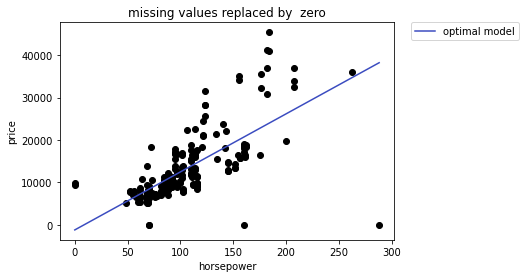

In [ ]:
scatter_plot(car_data[INPUT_FEATURE], car_data[LABEL],
             [slope], [bias], ["optimal model"], "zero")


## Exercise: Create a Scatter Plot for Different Features (1 Point)

Create a scatter plot with price as the input feature and losses as the label where the line optimizing the squared loss is shown.  We've gotten you started.  You just need to copy the appropriate lines from above.  **Save the slope and bias from this line to be used in a later exercise.**

-0.001716490814283506 119.82757638923839


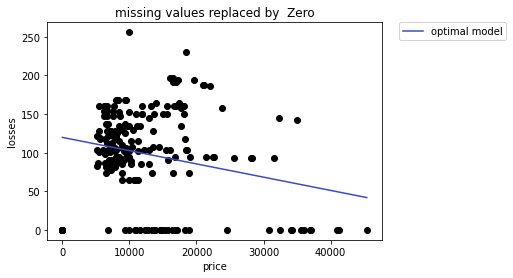

Optimal RMSE = 56.46997356440865 for solution [-1.71649081e-03  1.19827576e+02]


In [ ]:
INPUT_FEATURE = "price"
LABEL = "losses"
# Fill in the rest of this block.

x = car_data[INPUT_FEATURE]
y = car_data[LABEL]
opt = np.polyfit(x, y, 1)
y_pred = opt[0] * x + opt[1]
slope = opt[0]
bias = opt[1]
print(slope, bias)
scatter_plot(car_data[INPUT_FEATURE], car_data[LABEL],
             [slope], [bias], ["optimal model"], "Zero")
opt_rmse = math.sqrt(metrics.mean_squared_error(y_pred, y))
print("Optimal RMSE =", opt_rmse, "for solution", opt )


## Exercise: Explain what you see (1 point)


In [ ]:
"""
Explain why you are seeing so many points along the line y=0.
"""

'\nExplain why you are seeing so many points along the line y=0.\n'


###I observed that there are many 41 points (205-164 = 41) along with line y=0 i.e. feature losses having 0 values. 
###This is beacause first we have converterd unknown(?) values to NaN using pandas to_numeric with 'coerce' 

car_data['losses'] = pd.to_numeric(car_data['losses'], errors='coerce') 

###and then replace NaN by 0 to train linear model using features that is numerical

car_data.fillna(0, inplace=True).

###So, many points along with y=0 is due he way we handled unknown/missing values with 0. 
###Additionally, I observed high RMSE value (56.46) indicating that model is not fitted with data while we handle missing values by 0s

##Exercise: Explore Options to Handle Missing Data 

In this exercise you will explore alternate ways to handle missing data. When training a linear model using features that are numerical, we **cannot have `NaN` (doing so would cause overflow when training)**. One option is to just discard any rows with any missing entries but often this would not leave enough data.  Here we explore ways to handle the missing data without just discarding it.

Note that when you get a column of a dataframe (e.g. car_data["price']), you get a `Series`.  Read [http://pandas.pydata.org/pandas-docs/version/0.18.1/api.html#computations-descriptive-stats](http://pandas.pydata.org/pandas-docs/version/0.18.1/api.html#computations-descriptive-stats) and think about if you see any statistics for a column that might make a better choice than 0 for filling in the missing entries.What do you think would work best?

Modify the code to use the function you selected to replace missing data instead of just using 0. Look at both the scatter plots and the lines minimizing RMSEs of both outputs. Feel free to show multiple options as a tool to help you explain your choice of which you think is best. What option do you think is best and why?


In [ ]:
'''We have many options to handle missing data. 
Below I have shown comparative scatter plots 
with model by replacing missing values by median and 0'''
car_data_v2 = pd.read_csv('https://storage.googleapis.com/ml_universities/cars_dataset/cars_data.csv',
                           sep=',', names=cols, header=None, encoding='latin-1')
#car_data_v2['price'] = pd.to_numeric(car_data_v2['price'], errors='coerce')
#car_data_v2['losses']= pd.to_numeric(car_data_v2['losses'], errors='coerce')
car_data_v2['price'] = pd.to_numeric(car_data_v2['price'], errors='coerce')
car_data_v2['horsepower'] = pd.to_numeric(car_data_v2['horsepower'], errors='coerce')
car_data_v2['peak-rpm'] = pd.to_numeric(car_data_v2['peak-rpm'], errors='coerce')
car_data_v2['city-mpg'] = pd.to_numeric(car_data_v2['city-mpg'], errors='coerce')
car_data_v2['highway-mpg'] = pd.to_numeric(car_data_v2['highway-mpg'], errors='coerce')
car_data_v2['losses'] = pd.to_numeric(car_data_v2['losses'], errors='coerce')
car_data_v2.describe()
#car_data_v3 = car_data_v2.copy()

,symboling,losses,wheel-base,length,width,height,weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.00,164.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,203.00,203.00,205.00,205.00,201.00
mean,0.83,122.00,98.76,174.05,65.91,53.72,2555.57,126.91,10.14,104.26,5125.37,25.22,30.75,13207.13
std,1.25,35.44,6.02,12.34,2.15,2.44,520.68,41.64,3.97,39.71,479.33,6.54,6.89,7947.07
min,-2.00,65.00,86.60,141.10,60.30,47.80,1488.00,61.00,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,0.00,94.00,94.50,166.30,64.10,52.00,2145.00,97.00,8.60,70.00,4800.00,19.00,25.00,7775.00
50%,1.00,115.00,97.00,173.20,65.50,54.10,2414.00,120.00,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,2.00,150.00,102.40,183.10,66.90,55.50,2935.00,141.00,9.40,116.00,5500.00,30.00,34.00,16500.00
max,3.00,256.00,120.90,208.10,72.30,59.80,4066.00,326.00,23.00,288.00,6600.00,49.00,54.00,45400.00


In [ ]:
#replacing NaN by median and plotting in scatter plot with linear model
car_data_v2.fillna(car_data_v2.median(), inplace=True)
#print(car_data_v2.median())
car_data_v2.describe()
#car_data_v3.fillna(car_data_v2.mean(), inplace=True)
#car_data_v3.describe()

,symboling,losses,wheel-base,length,width,height,weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,120.60,98.76,174.05,65.91,53.72,2555.57,126.91,10.14,104.17,5126.10,25.22,30.75,13150.31
std,1.25,31.81,6.02,12.34,2.15,2.44,520.68,41.64,3.97,39.53,477.04,6.54,6.89,7879.12
min,-2.00,65.00,86.60,141.10,60.30,47.80,1488.00,61.00,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,0.00,101.00,94.50,166.30,64.10,52.00,2145.00,97.00,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,1.00,115.00,97.00,173.20,65.50,54.10,2414.00,120.00,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,2.00,137.00,102.40,183.10,66.90,55.50,2935.00,141.00,9.40,116.00,5500.00,30.00,34.00,16500.00
max,3.00,256.00,120.90,208.10,72.30,59.80,4066.00,326.00,23.00,288.00,6600.00,49.00,54.00,45400.00


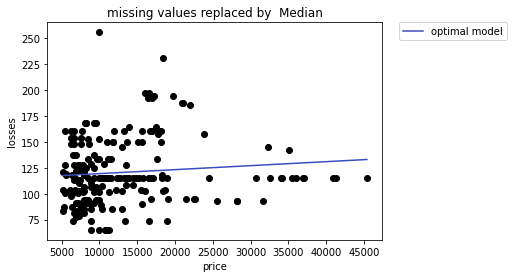

Optimal RMSE while missing replaced by median = 31.58245796825604 for solution [3.85453599e-04 1.15531167e+02]


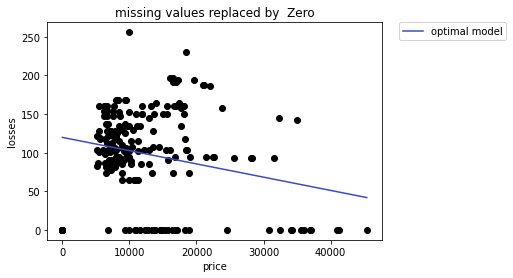

Optimal RMSE while missing values replaced by 0 = 56.46997356440865 for solution [-1.71649081e-03  1.19827576e+02]


In [ ]:
# Create a scatter plot with the model from above (when NA replaced by 0) and at least one other option.
#calculating new slope, bias and RMSE for median
x_v2 = car_data_v2[INPUT_FEATURE]
y_v2 = car_data_v2[LABEL]
opt_v2 = np.polyfit(x_v2, y_v2, 1)
y_pred_v2 = opt_v2[0] * x_v2 + opt_v2[1]
opt_v2_rmse = math.sqrt(metrics.mean_squared_error(y_pred_v2, y_v2))
slope_v2 = opt_v2[0]
bias_v2 = opt_v2[1]
#print(slope_v2, bias_v2, opt_v2_rmse)

#plotting scater plot while mising values replaced by median
scatter_plot(car_data_v2[INPUT_FEATURE], car_data_v2[LABEL],
             [slope_v2], [bias_v2], ["optimal model"], "Median")
print("Optimal RMSE while missing replaced by median =", opt_v2_rmse, "for solution", opt_v2)
#plotting scater plot while mising values replaced by 0
scatter_plot(car_data[INPUT_FEATURE], car_data[LABEL],
             [slope], [bias], ["optimal model"], "Zero")
print("Optimal RMSE while missing values replaced by 0 =", opt_rmse, "for solution", opt )
#x_v2.describe()


In [ ]:
"""
What option you think is best and why?
"""


'\nWhat option you think is best and why?\n'


###Out of various options, first option is: drop the rows which has unknown/missing data with function 
Series.dropna([axis, inplace]) 
###This option is suitable only when there is very low percentage of missing data. But in this case,(41/205)*100 = 20% of data points are missing in target variable losses. We can't simply discard missing data as it would not leave enogh data for analysis. Additionally,  important data can be discarded.

###Second Option is: fill/replace missing data by certain value. We have already replaced missing data by 0 and observed very high RMSE, so no optimal model with this way.
###Next option we can work on to replace missing values by the measure of center tendency of data that are Mean, Median and Mode. If the data distribution is not skew, we can Use Mean to replace missing data. But if data distribution is skew, few outliers can change Mean by significantly. In that case, Mean can mislead us so Median or Mode can be used to replace of missiing value.
###To observe if data is skewed or not, we can simply use 
'Series.skew([axis, skipna, level, numeric_only]' 
###function or we can use scatter plot and observe skewness. In our example, target attributes losses slighly skewed rightwards, so median is better measure to replace missing values than Mean.

###Third option we can deploy to handle missing data is interpolate values using function Series.interpolate([method, axis, limit, ...]). 

###Here, RMSE in case of missing by median(31.58) is about half of RMSE value calculated while missing values replaced by 0 (56.46). So, Handling missing values by Meadian approach is better than both replacing missing values by 0 as well as discarding records which have missing value.

##Lab Link: https://colab.research.google.com/drive/18MDyP8-H_QoZBvoNaKU-faZwRilwilpX?usp=sharing
